# Week 11 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #P: Put value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.00000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)-S * si.norm.cdf(-d1, 0.0, 1.0)
        vega = S * np.sqrt(T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(189.97, 200, 1/12, 10, 0.0353)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 150' ) 

0 0.16354507338274377 -1.5450266421130436
1 0.15077990819802625 -0.16872937912356178
2 0.1501726517583485 -0.007312971219789688
3 0.15017112220438256 -1.8327433934928195e-05
The implied volatility is 15.02 % for the one-month call with strike $ 150


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2024-01-05')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240105P00110000,2023-12-01 20:53:41+00:00,110.0,0.02,0.01,0.03,0.00,0.000000,1.0,1,0.632816,False,REGULAR,USD
1,AAPL240105P00115000,2023-12-01 15:43:32+00:00,115.0,0.02,0.02,0.03,0.00,0.000000,8.0,15,0.597660,False,REGULAR,USD
2,AAPL240105P00120000,2023-11-30 17:06:42+00:00,120.0,0.02,0.03,0.03,0.00,0.000000,NaN,23,0.558598,False,REGULAR,USD
3,AAPL240105P00125000,2023-12-01 18:15:37+00:00,125.0,0.03,0.03,0.04,0.00,0.000000,1.0,50,0.519536,False,REGULAR,USD
4,AAPL240105P00130000,2023-12-01 19:26:27+00:00,130.0,0.04,0.04,0.04,0.00,0.000000,1.0,3,0.480474,False,REGULAR,USD
5,AAPL240105P00135000,2023-12-01 20:55:43+00:00,135.0,0.05,0.04,0.05,0.00,0.000000,1.0,13,0.447271,False,REGULAR,USD
6,AAPL240105P00140000,2023-11-28 15:46:45+00:00,140.0,0.06,0.06,0.07,0.00,0.000000,1.0,27,0.419928,False,REGULAR,USD
7,AAPL240105P00145000,2023-12-01 15:39:30+00:00,145.0,0.07,0.07,0.08,0.00,0.000000,1.0,60,0.382819,False,REGULAR,USD
8,AAPL240105P00150000,2023-12-04 15:03:05+00:00,150.0,0.08,0.09,0.10,-0.03,-27.272728,1.0,33,0.348639,False,REGULAR,USD
9,AAPL240105P00155000,2023-12-01 16:59:02+00:00,155.0,0.11,0.11,0.12,0.00,0.000000,3.0,24,0.312019,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.BS([189.97, opt.puts.strike[i], 3.53, 32], putPrice = opt.puts.lastPrice[i])
    impliedvol [i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile/Skew')

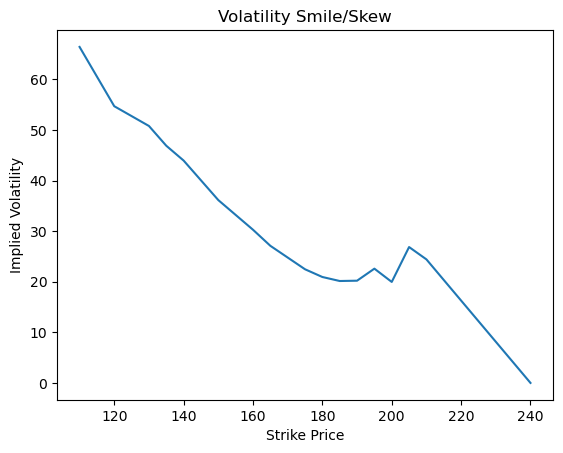

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile/Skew')

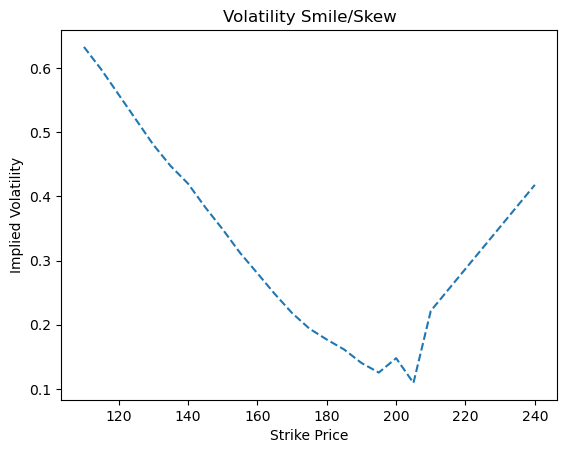

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile/Skew')

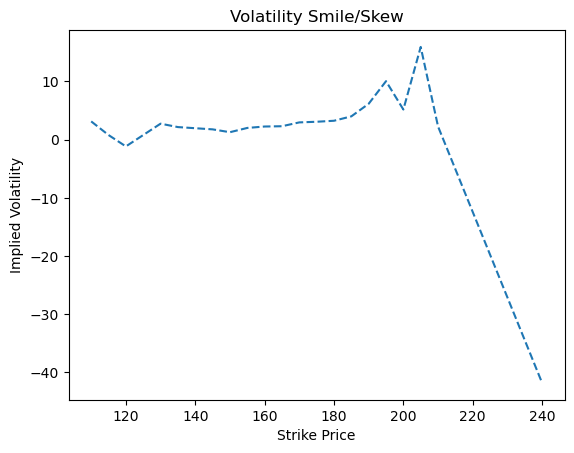

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile/Skew')

## Question 6

In [11]:
import arrow
T = ['2023-12-08', '2023-12-15', '2023-12-22', '2023-12-29', '2024-01-05', '2024-01-19', '2024-02-16', 
     '2024-03-15', '2024-04-19', '2024-06-21', '2024-07-19', '2024-09-20', '2024-12-20', '2025-01-17', '2025-06-20', 
     '2025-09-19', '2025-12-19', '2026-01-16']

In [12]:
K = np.linspace(170.00,190.00,3)
now = arrow.get('2023-12-04')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]]
        

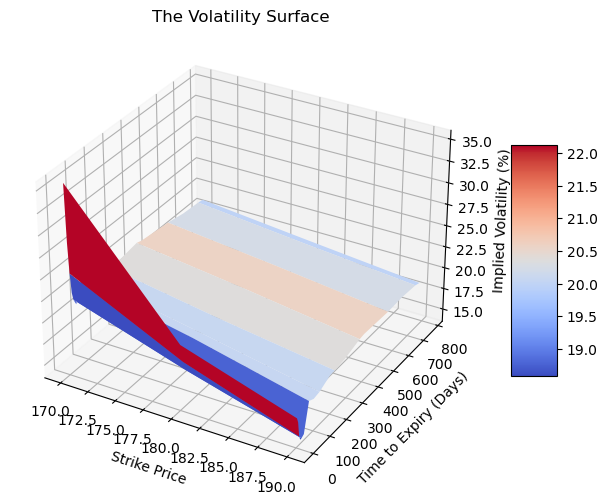

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);